In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import time
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv(r'C:\Users\admin\Desktop\data science learning\7. Projects\sensorpump.csv')

In [3]:
data.shape

(220320, 55)

In [4]:
data.describe()

,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
count,220320.000000,210112.000000,219951.000000,220301.000000,220301.000000,220301.000000,220301.000000,215522.000000,214869.000000,215213.000000,...,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,143303.000000,204937.000000
mean,110159.500000,2.372221,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,15.200721,...,35.453455,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968,183.049260,202.699667
std,63601.049991,0.412227,3.296666,3.666820,2.418887,144.023912,17.298247,2.163736,2.201155,2.037390,...,10.259521,11.044404,11.576355,12.837520,15.641284,10.442437,82.244957,19.143598,65.258650,109.588607
min,0.000000,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,...,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.488426,27.777779
25%,55079.750000,2.438831,46.310760,50.390620,42.838539,626.620400,69.976260,13.346350,15.907120,15.183740,...,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,167.534700,179.108800
50%,110159.500000,2.456539,48.133678,51.649300,44.227428,632.638916,75.576790,13.642940,16.167530,15.494790,...,35.156250,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,193.865700,197.338000
75%,165239.250000,2.499826,49.479160,52.777770,45.312500,637.615723,80.912150,14.539930,16.427950,15.697340,...,36.979164,46.614580,45.138890,44.849540,51.215280,46.585650,208.333300,60.763890,219.907400,216.724500
max,220319.000000,2.549016,56.727430,56.032990,48.220490,800.000000,99.999880,22.251160,23.596640,24.348960,...,374.218800,408.593700,1000.000000,320.312500,370.370400,303.530100,561.632000,464.409700,1000.000000,1000.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
Unnamed: 0        220320 non-null int64
timestamp         220320 non-null object
sensor_00         210112 non-null float64
sensor_01         219951 non-null float64
sensor_02         220301 non-null float64
sensor_03         220301 non-null float64
sensor_04         220301 non-null float64
sensor_05         220301 non-null float64
sensor_06         215522 non-null float64
sensor_07         214869 non-null float64
sensor_08         215213 non-null float64
sensor_09         215725 non-null float64
sensor_10         220301 non-null float64
sensor_11         220301 non-null float64
sensor_12         220301 non-null float64
sensor_13         220301 non-null float64
sensor_14         220299 non-null float64
sensor_15         0 non-null float64
sensor_16         220289 non-null float64
sensor_17         220274 non-null float64
sensor_18         220274 non-null float64
sensor_19      

<h3>1. Data Preprocessing </h3>

In [6]:
# deleting column named as sensor 15.
data = data.drop('sensor_15', 1)
data = data.drop('Unnamed: 0', 1)
data.shape

(220320, 53)

In [7]:
#creating new columns named as data and time from timestamp and deleting the column timestamp.
data['date'] = data['timestamp'].apply(lambda x: x.split(' ')[0])
data['time'] = data['timestamp'].apply(lambda x: x.split(' ')[1])
data = data.drop(['timestamp'], 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 54 columns):
sensor_00         210112 non-null float64
sensor_01         219951 non-null float64
sensor_02         220301 non-null float64
sensor_03         220301 non-null float64
sensor_04         220301 non-null float64
sensor_05         220301 non-null float64
sensor_06         215522 non-null float64
sensor_07         214869 non-null float64
sensor_08         215213 non-null float64
sensor_09         215725 non-null float64
sensor_10         220301 non-null float64
sensor_11         220301 non-null float64
sensor_12         220301 non-null float64
sensor_13         220301 non-null float64
sensor_14         220299 non-null float64
sensor_16         220289 non-null float64
sensor_17         220274 non-null float64
sensor_18         220274 non-null float64
sensor_19         220304 non-null float64
sensor_20         220304 non-null float64
sensor_21         220304 non-null float64
sensor_

In [8]:
data_imputed = data.fillna(data.median())

In [9]:
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 54 columns):
sensor_00         220320 non-null float64
sensor_01         220320 non-null float64
sensor_02         220320 non-null float64
sensor_03         220320 non-null float64
sensor_04         220320 non-null float64
sensor_05         220320 non-null float64
sensor_06         220320 non-null float64
sensor_07         220320 non-null float64
sensor_08         220320 non-null float64
sensor_09         220320 non-null float64
sensor_10         220320 non-null float64
sensor_11         220320 non-null float64
sensor_12         220320 non-null float64
sensor_13         220320 non-null float64
sensor_14         220320 non-null float64
sensor_16         220320 non-null float64
sensor_17         220320 non-null float64
sensor_18         220320 non-null float64
sensor_19         220320 non-null float64
sensor_20         220320 non-null float64
sensor_21         220320 non-null float64
sensor_

In [10]:
data_imputed.shape

(220320, 54)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BB7F353438>,
      dtype=object)

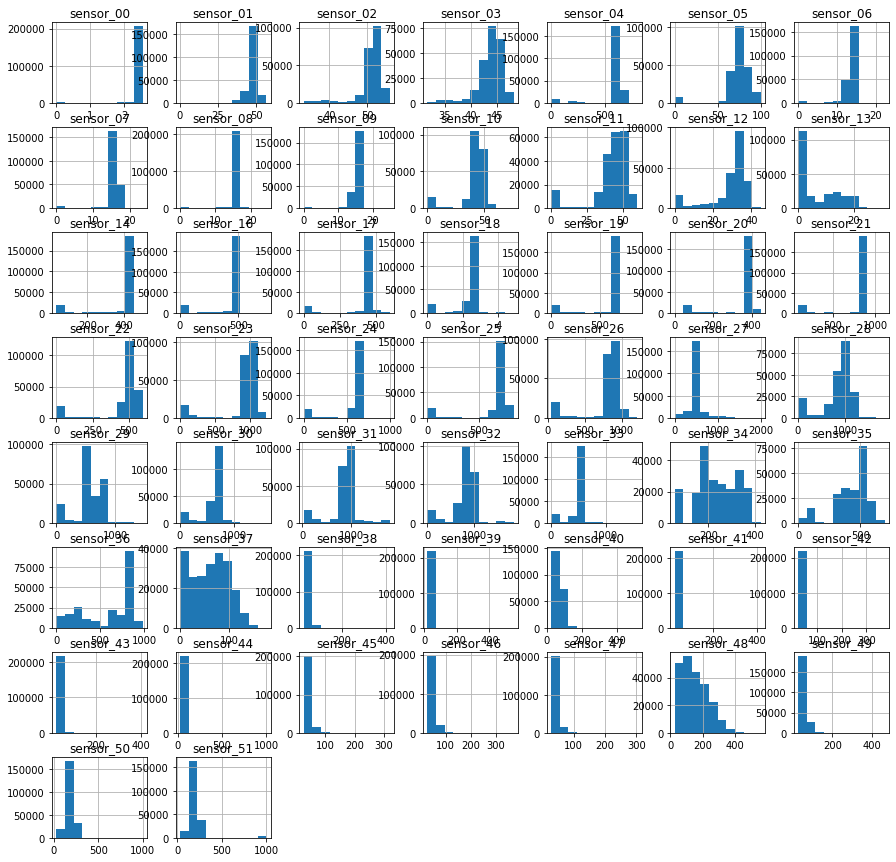

In [11]:
data_imputed.hist(figsize=(15,15))

<h3> Removing outliers</h3>

In [12]:
z_scores = zscore(data_imputed.iloc[:,:51])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_outlir = data_imputed[filtered_entries]
data_outlir 

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status,date,time
0,2.465394,47.092010,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,2018-04-01,00:00:00
1,2.465394,47.092010,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,2018-04-01,00:01:00
2,2.444734,47.352430,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,15.01013,...,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL,2018-04-01,00:02:00
3,2.460474,47.092010,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,15.08247,...,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL,2018-04-01,00:03:00
4,2.445718,47.135410,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,15.08247,...,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL,2018-04-01,00:04:00
5,2.453588,47.092010,53.168400,46.397568,637.615700,78.18568,13.41146,16.16753,15.89265,15.16204,...,63.65741,51.79398,38.773150,164.6412,66.55093,241.6088,201.6782,NORMAL,2018-04-01,00:05:00
6,2.455556,47.048610,53.168400,46.397568,633.333300,75.81614,13.43316,16.13136,15.65393,15.08247,...,61.92130,51.79398,39.062500,171.8750,67.70834,240.1620,200.2315,NORMAL,2018-04-01,00:06:00
7,2.449653,47.135410,53.168400,46.397568,630.671300,75.77331,13.25231,16.12413,16.19647,15.08247,...,59.60648,50.92593,39.351850,178.5301,68.57639,241.3194,201.0995,NORMAL,2018-04-01,00:07:00
8,2.463426,47.092010,53.168400,46.397568,631.944400,74.58916,13.28848,16.13136,15.47309,15.11863,...,57.87037,50.63657,39.351850,182.0023,69.44444,243.0556,201.6782,NORMAL,2018-04-01,00:08:00
9,2.445718,47.178820,53.168400,46.397568,641.782300,74.57428,13.38252,16.24711,15.61777,15.11863,...,56.42361,50.63657,39.062500,186.6319,69.73380,246.5278,200.8102,NORMAL,2018-04-01,00:09:00


In [13]:
data_outlir.shape

(165201, 54)

In [14]:
((220320 - 165201)/220320) * 100

25.017701525054463

In [15]:
index_names = data_outlir[(data_outlir['machine_status'] == 'BROKEN')].index 

In [16]:
data_outlir.drop(labels=index_names , inplace = True)
data_outlir

C:\Python\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status,date,time
0,2.465394,47.092010,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,2018-04-01,00:00:00
1,2.465394,47.092010,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,2018-04-01,00:01:00
2,2.444734,47.352430,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,15.01013,...,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL,2018-04-01,00:02:00
3,2.460474,47.092010,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,15.08247,...,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL,2018-04-01,00:03:00
4,2.445718,47.135410,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,15.08247,...,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL,2018-04-01,00:04:00
5,2.453588,47.092010,53.168400,46.397568,637.615700,78.18568,13.41146,16.16753,15.89265,15.16204,...,63.65741,51.79398,38.773150,164.6412,66.55093,241.6088,201.6782,NORMAL,2018-04-01,00:05:00
6,2.455556,47.048610,53.168400,46.397568,633.333300,75.81614,13.43316,16.13136,15.65393,15.08247,...,61.92130,51.79398,39.062500,171.8750,67.70834,240.1620,200.2315,NORMAL,2018-04-01,00:06:00
7,2.449653,47.135410,53.168400,46.397568,630.671300,75.77331,13.25231,16.12413,16.19647,15.08247,...,59.60648,50.92593,39.351850,178.5301,68.57639,241.3194,201.0995,NORMAL,2018-04-01,00:07:00
8,2.463426,47.092010,53.168400,46.397568,631.944400,74.58916,13.28848,16.13136,15.47309,15.11863,...,57.87037,50.63657,39.351850,182.0023,69.44444,243.0556,201.6782,NORMAL,2018-04-01,00:08:00
9,2.445718,47.178820,53.168400,46.397568,641.782300,74.57428,13.38252,16.24711,15.61777,15.11863,...,56.42361,50.63657,39.062500,186.6319,69.73380,246.5278,200.8102,NORMAL,2018-04-01,00:09:00


In [17]:
data_outlir['machine_status'].value_counts()

NORMAL        165016
RECOVERING       183
Name: machine_status, dtype: int64

In [18]:
scaler = MinMaxScaler()
data_std = scaler.fit_transform(data_outlir.iloc[:,:51])
data_std = pd.DataFrame(data_std)

In [19]:
X = data_std

In [20]:
data_va = data_std.var(axis= 0)
data_vas = data_va.sort_values(ascending=False)
y = data_vas.values 
x = range(len(y))

In [21]:
data_vas.index[0]

35

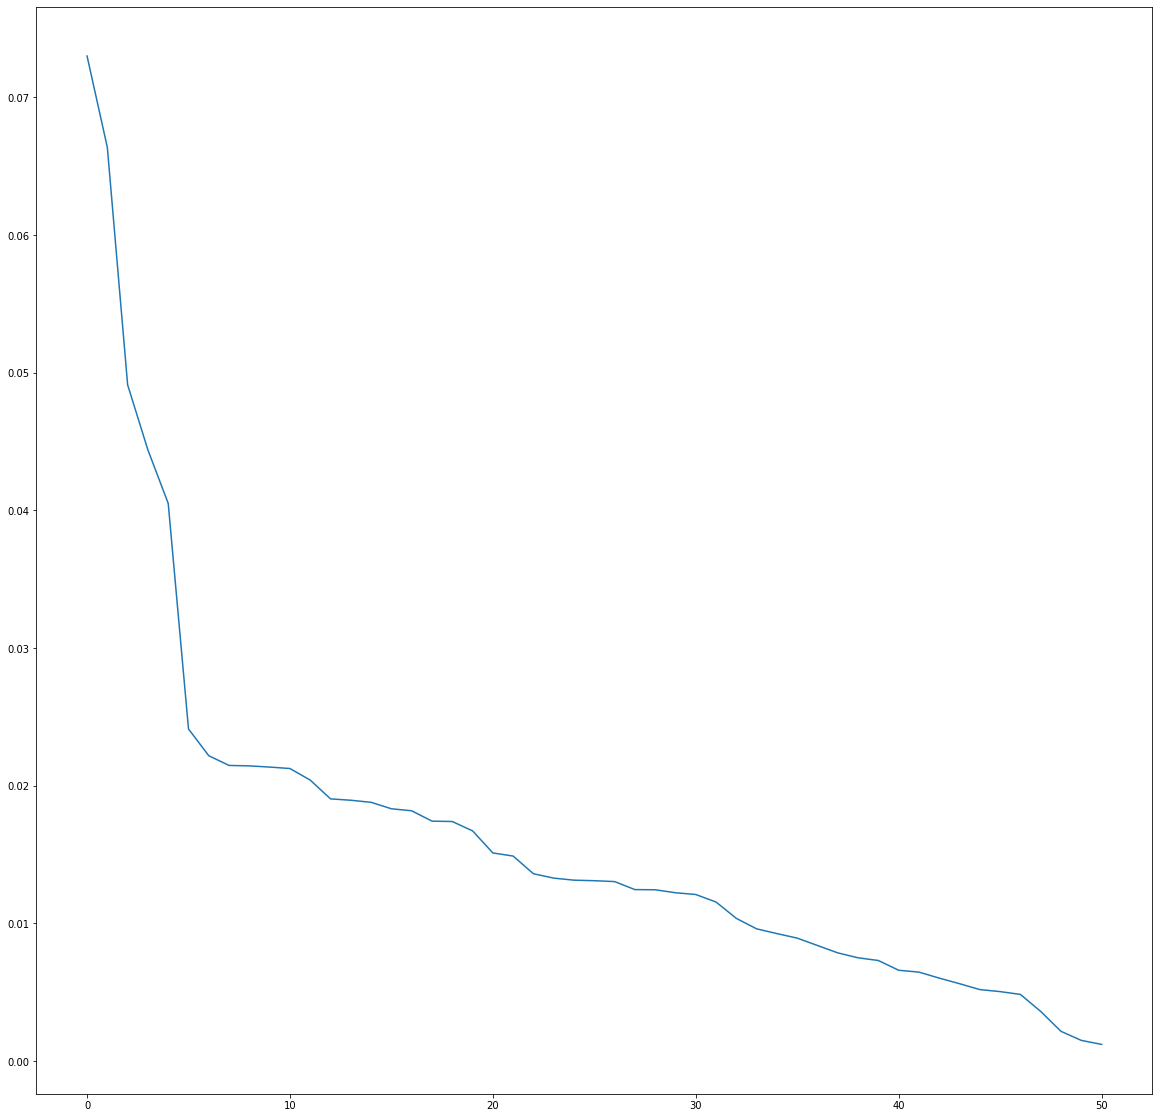

In [22]:
plt.figure(figsize = (20,20))
plt.plot(x, y)
plt.show()

In [23]:
corrmatrix = data_std.corr()

In [24]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    return dataset

In [25]:
datas = correlation(data_std, 0.7)
datas.head()

,0,1,2,3,4,5,6,7,8,10,...,38,39,43,44,45,46,47,48,49,50
0,0.939112,0.480094,0.825268,0.837036,0.733213,0.658273,0.666983,0.576098,0.600776,0.520389,...,0.131004,0.4025,0.216867,0.689266,0.307340,0.162338,0.345454,0.437063,0.671642,0.400288
1,0.939112,0.480094,0.825268,0.837036,0.733213,0.658273,0.666983,0.576098,0.600776,0.520389,...,0.131004,0.4025,0.216867,0.689266,0.307340,0.162338,0.345454,0.437063,0.671642,0.400288
2,0.924069,0.494145,0.825268,0.844444,0.740484,0.615974,0.655629,0.562820,0.606202,0.530791,...,0.126638,0.3925,0.210843,0.683616,0.311927,0.162338,0.339921,0.430070,0.666045,0.406047
3,0.935530,0.480094,0.822580,0.844444,0.723145,0.665955,0.654684,0.592442,0.614729,0.542358,...,0.131004,0.4175,0.204819,0.672316,0.311927,0.162338,0.339921,0.426573,0.663246,0.404608
4,0.924786,0.482435,0.825268,0.844444,0.736569,0.660148,0.659414,0.587335,0.614729,0.557134,...,0.131004,0.4625,0.198795,0.677966,0.321101,0.175325,0.346245,0.423077,0.668843,0.400288


In [26]:
le = LabelEncoder()
Y = le.fit_transform(data_outlir['machine_status'])

<h3>2. Explodatory data analysis</h3>

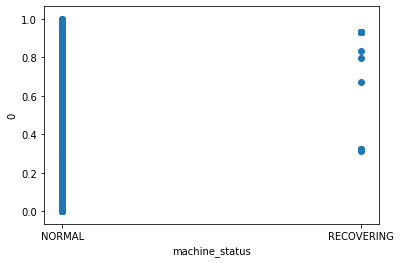

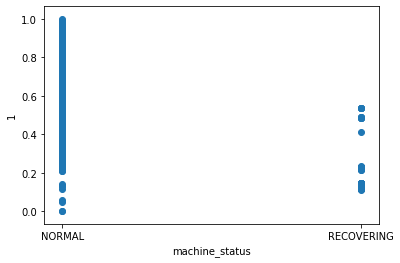

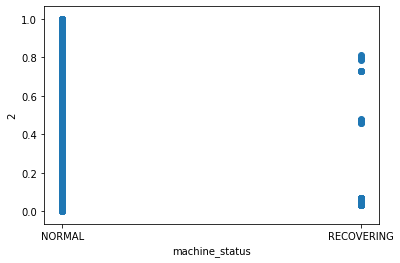

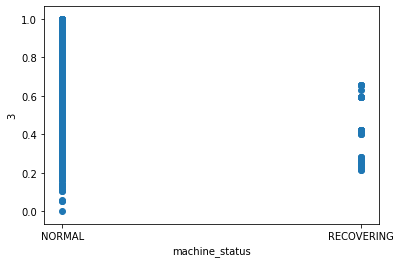

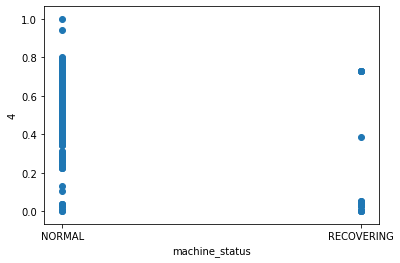

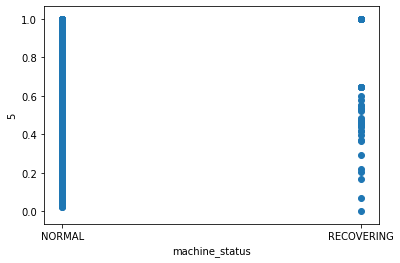

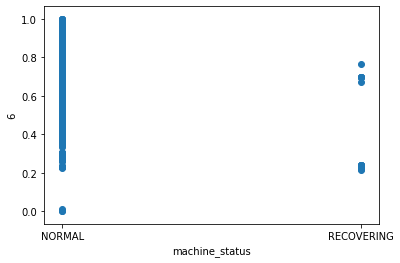

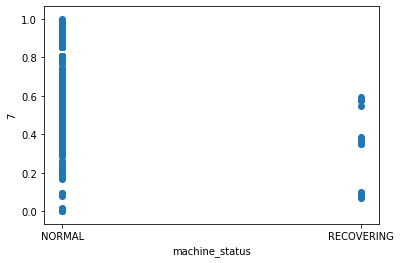

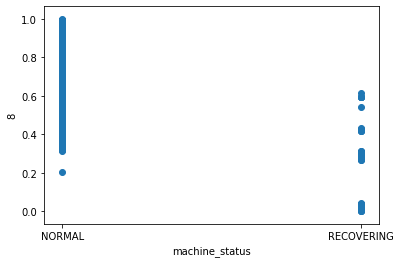

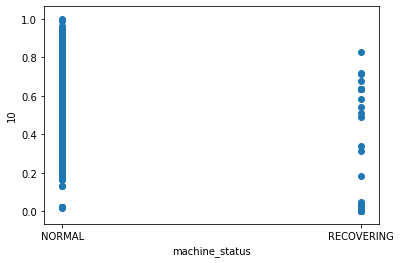

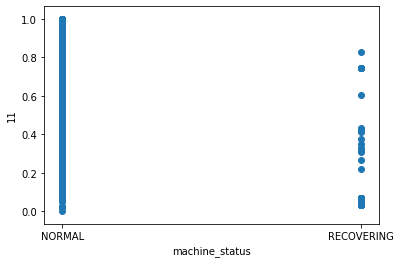

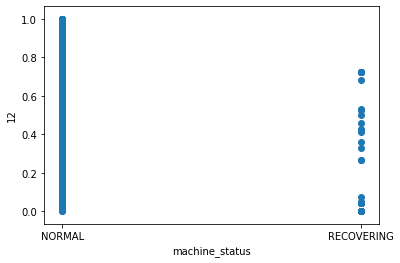

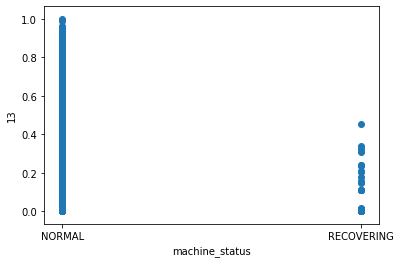

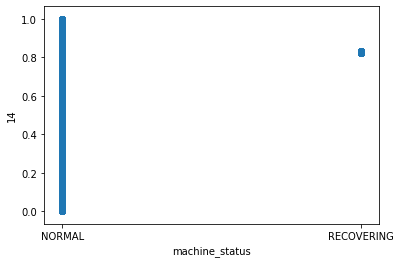

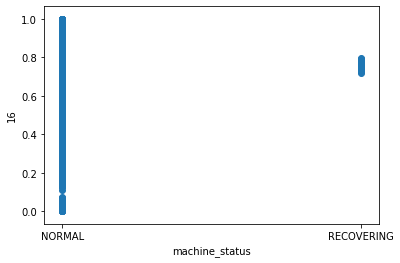

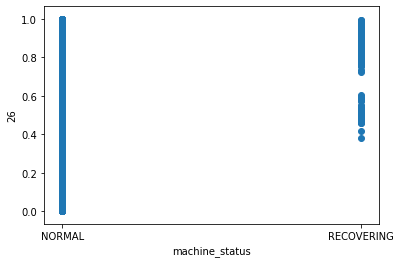

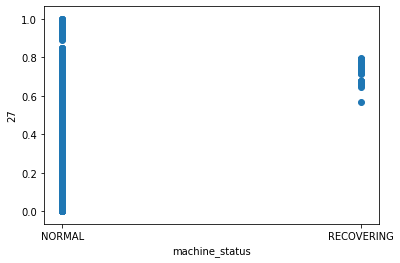

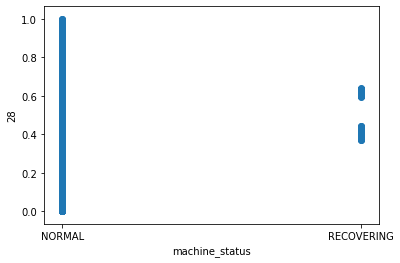

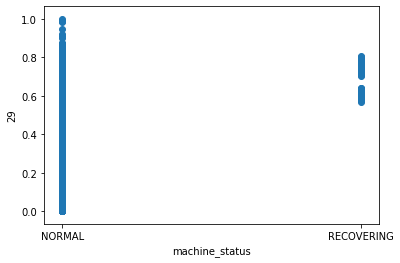

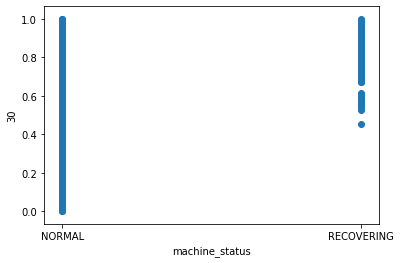

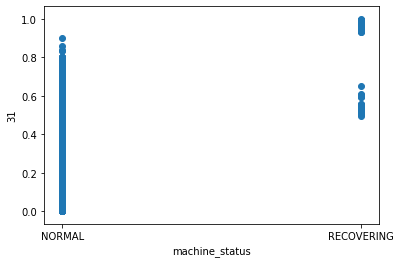

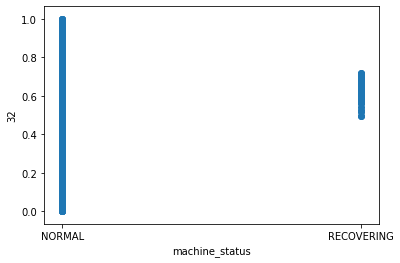

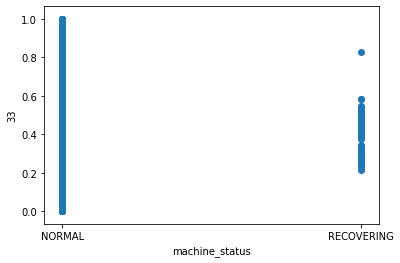

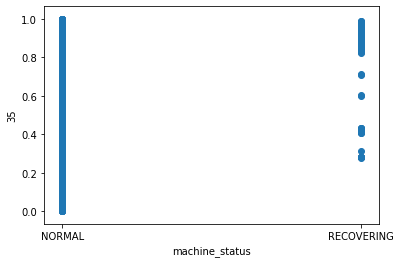

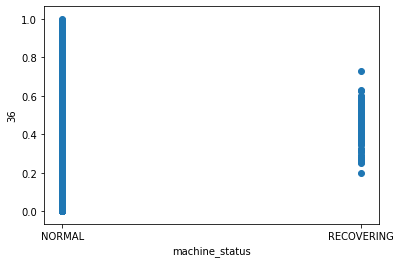

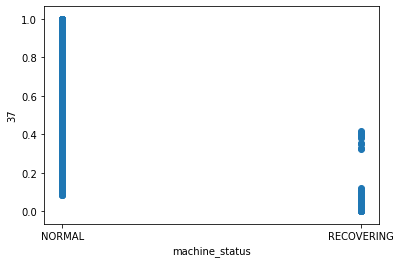

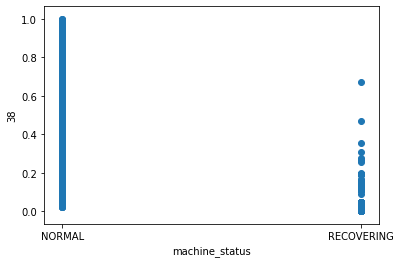

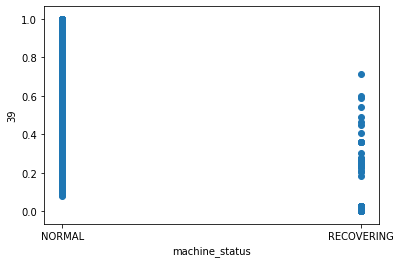

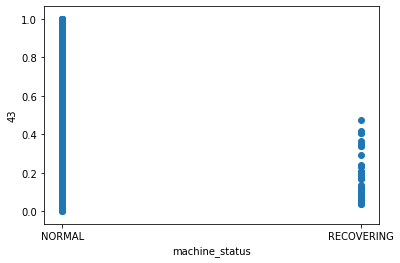

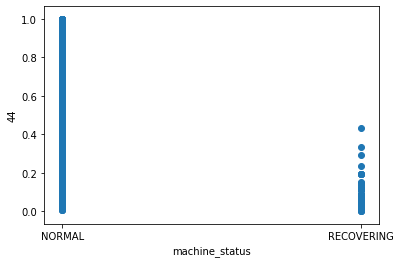

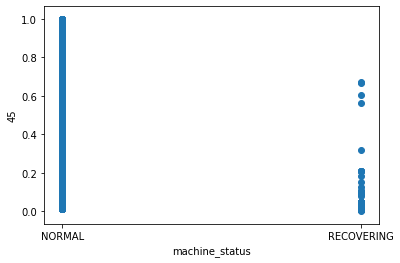

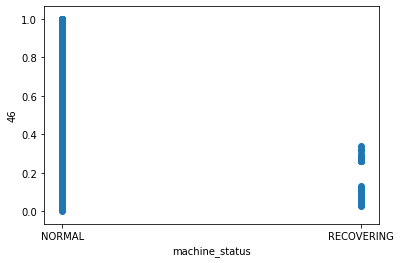

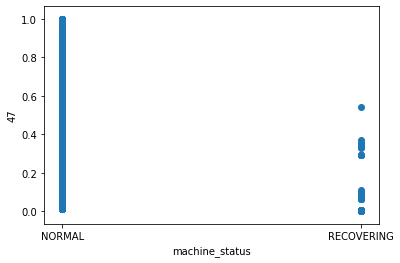

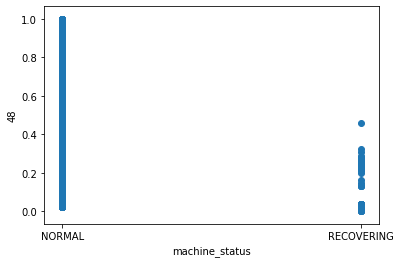

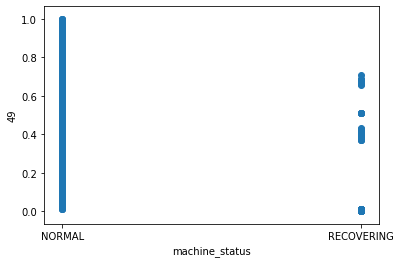

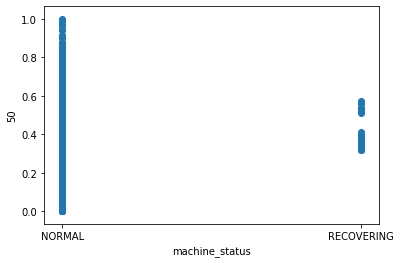

In [27]:
#plotting scatter plots for every feature w.r.t machine status
# 0 for normal and 1 for recovery
for i in data_std.columns:
    plt.scatter( data_outlir['machine_status'] , data_std[i] )
    plt.xlabel('machine_status')
    plt.ylabel(i)
    plt.show()

1. turns out most of the data pts(i.e days) belongs to normal class, while for class recovery it varies.

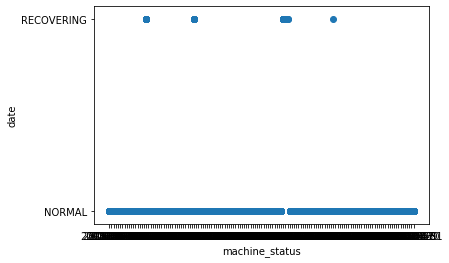

In [28]:
plt.scatter( data_outlir['date'] , data_outlir['machine_status'] )
plt.xlabel('machine_status')
plt.ylabel('date')
plt.show()

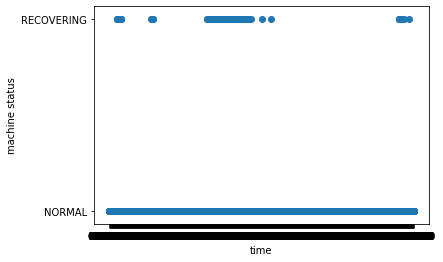

In [29]:
plt.scatter( data_outlir['time'] , data_outlir['machine_status'] )
plt.xlabel('time')
plt.ylabel('machine status')
plt.show()

1. Seems like most recovering happened at timings between 10 am to 12 o'clock.
2. Most brokage happened as 12 o'clock and at around 8 am in morning.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [31]:
#applying knn
scores = []
for i in [3,5,10,15]:
    knn = KNeighborsClassifier(n_neighbors=i)
    sco = cross_val_score(knn, X_train, y_train, cv = 5) 
    scores.append(np.mean(sco))

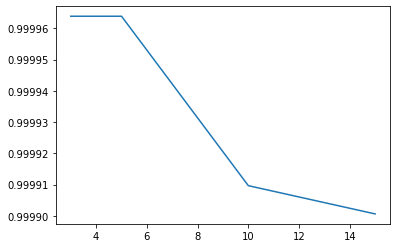

In [32]:
plt.plot([3,5,10,15],scores)
plt.show()

In [33]:
knn = KNeighborsClassifier(n_neighbors=15)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [34]:
roc_auc_score(y_test, y_pred)

0.9787234042553192

As auc score is 0.97, which denotes the classification power of knn to be satisfactory.

In [35]:
#applying logistic regression
lr = LogisticRegression(C = 0.2)
clf1 = lr.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)

In [36]:
roc_auc_score(y_test, y_pred1)

0.9680851063829787

As auc score is 0.96 for inverse of hyperparameter, which denotes the classification power of logistic regression to be satisfactory.

In [37]:
#applying naive bayes
clf2 = GaussianNB().fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)

In [38]:
roc_auc_score(y_test, y_pred2)

0.9781726322565677

In [43]:
#applying decision tree
clf3 = tree.DecisionTreeClassifier().fit(X_train, y_train)
y_pred3 = clf3.predict(X_test)

In [44]:
roc_auc_score(y_test, y_pred3)

0.9787050451886942

In [47]:
#applying random forest
clf4 = RandomForestClassifier(max_depth=5, random_state=0).fit(X_train, y_train)
y_pred4 = clf4.predict(X_test)

In [48]:
roc_auc_score(y_test, y_pred4)

0.9787234042553192

In [49]:
#applying support vector machine
clf5 = SVC(gamma='auto').fit(X_train, y_train)
y_pred5 = clf5.predict(X_test)

In [50]:
roc_auc_score(y_test, y_pred5)

0.9787234042553192